In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

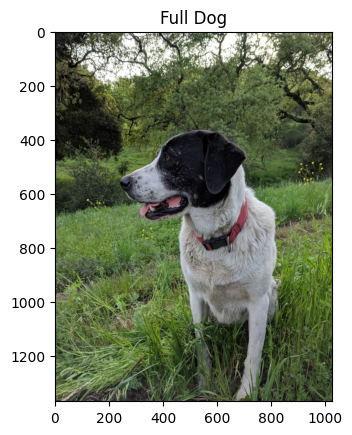

In [2]:
full = cv2.imread("../resources/DATA/sammy.jpg")
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)
plt.title("Full Dog")
plt.show()

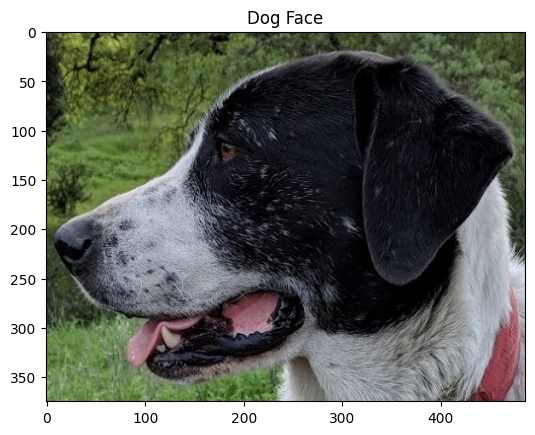

In [4]:
face = cv2.imread("../resources/DATA/sammy_face.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)
plt.title("Dog Face")
plt.show()

In [5]:
full.shape, face.shape

((1367, 1025, 3), (375, 486, 3))

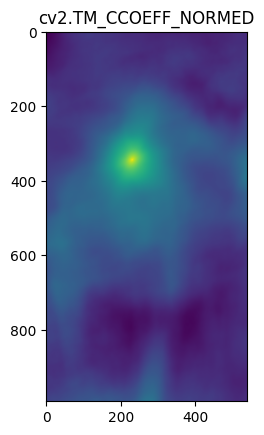

In [6]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

def get_result_for_method(img, method_name):
    method = eval(method_name)

    res = cv2.matchTemplate(img, face, method)

    return res

# example 
result_img = get_result_for_method(full.copy(), methods[1])
plt.title(methods[1])
plt.imshow(result_img)
plt.show()

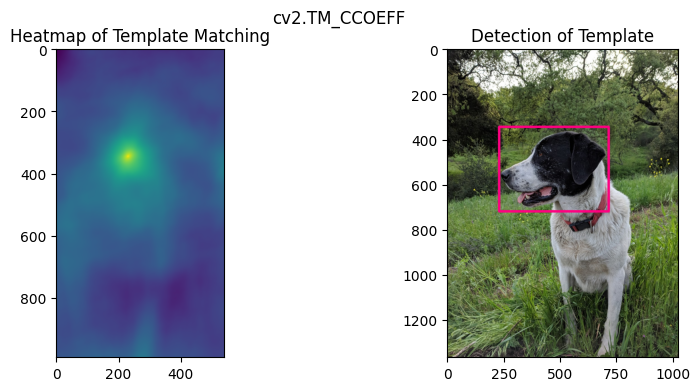

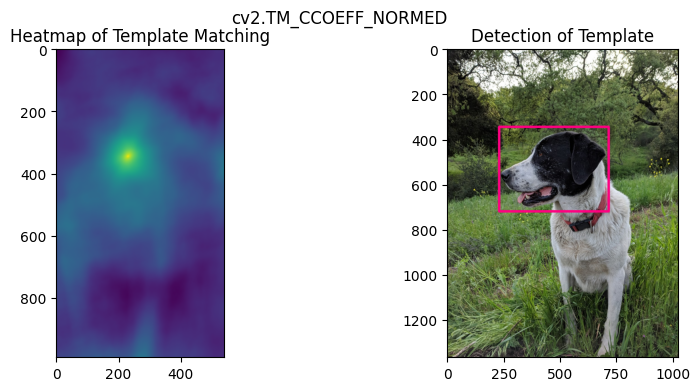

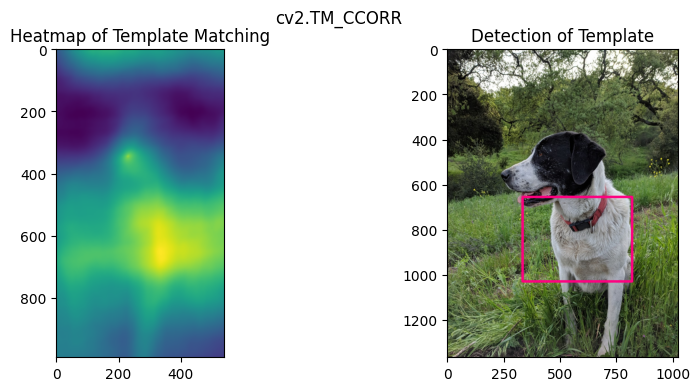

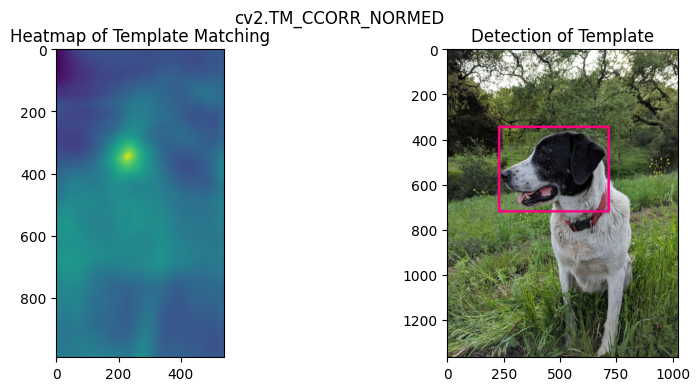

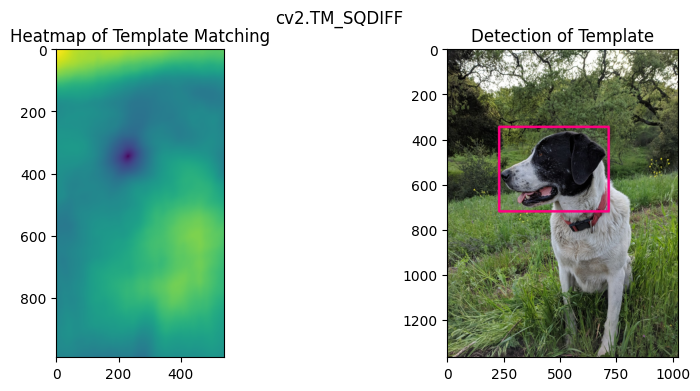

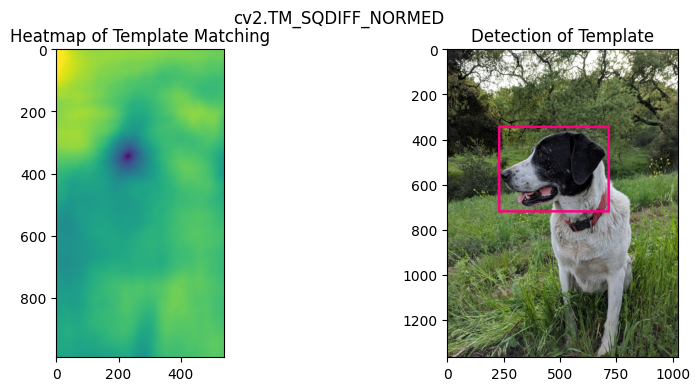

In [9]:
def plot_location_for_method(img, method_name):
    method = eval(method_name)

    res = cv2.matchTemplate(img, face, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    height, width, _ = face.shape

    bottom_right = (top_left[0] + width, top_left[1] + height)

    cv2.rectangle(img, top_left, bottom_right, (255, 0, 128), 10)

    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(res)
    plt.title("Heatmap of Template Matching")

    plt.subplot(1, 2, 2)
    plt.imshow(img)
    plt.title("Detection of Template")

    plt.suptitle(method_name)

    plt.show()

for m in methods:
    plot_location_for_method(full.copy(), m)